In [3]:
import pandas as pd
import matplotlib.pyplot as plt
from neuralforecast.losses.numpy import mae
from neuralforecast.core import NeuralForecast
from neuralforecast.models import Informer, Autoformer, FEDformer, PatchTST
from neuralforecast.models import LSTM, TCN, NHITS

In [4]:
data_gold = pd.read_csv('gold.csv')
data_silver = pd.read_csv('silver.csv')
data_platinum = pd.read_csv('platinum.csv')

In [5]:
def standard_scaler(data):
    mean = data['y'].mean()
    std = data['y'].std()
    data['y'] = (data['y']-mean)/std
    return mean, std, data

In [6]:
mean_gold, std_gold, data_gold = standard_scaler(data_gold)
mean_silver, std_silver, data_silver = standard_scaler(data_silver)
mean_platinum, std_platinum, data_platinum = standard_scaler(data_platinum)

In [7]:
data = pd.concat([data_gold,data_silver])
data

,ds,y,unique_id
0,0,-1.336501,gold
1,1,-1.323519,gold
2,2,-1.260577,gold
3,3,-1.291655,gold
4,4,-1.246415,gold
...,...,...,...
1285,1285,0.951773,silver
1286,1286,0.983087,silver
1287,1287,0.920697,silver
1288,1288,0.968616,silver


In [8]:
horizon = 1

In [9]:
%%capture
models_nn = [LSTM(h=horizon,                 # Forecasting horizon
                  input_size=30,         # Input size
                  max_steps=1000,               # Number of training iterations
                  val_check_steps=100,          # Compute validation loss every 100 steps
                  early_stop_patience_steps=3), # Stop training if validation loss does not improve
            TCN(h=horizon,
                  input_size=30,
                  max_steps=1000,
                  val_check_steps=100,
                  early_stop_patience_steps=3),
            NHITS(h=horizon,
                  input_size=30,
                  max_steps=1000,
                  val_check_steps=100,
                  early_stop_patience_steps=3)
            ]  

Global seed set to 1
Global seed set to 1
Global seed set to 1


In [10]:
nn = NeuralForecast(models=models_nn, freq='D')

data_nn = nn.cross_validation(df=data,
                              val_size=int(.1*len(data.ds.unique())),
                              test_size=int(.1*len(data.ds.unique())),
                              n_windows=None)

Sanity Checking: 0it [00:00, ?it/s]

Training: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Predicting: 0it [00:00, ?it/s]

Sanity Checking: 0it [00:00, ?it/s]

Training: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Predicting: 0it [00:00, ?it/s]

Sanity Checking: 0it [00:00, ?it/s]

Training: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Predicting: 0it [00:00, ?it/s]

In [11]:
data_nn

,unique_id,ds,cutoff,LSTM,TCN,NHITS,y
0,gold,1161,1160,1.277039,0.519115,1.065338,1.150495
1,gold,1162,1161,1.322477,0.520593,1.150388,1.153642
2,gold,1163,1162,1.321808,0.522732,1.160021,1.181573
3,gold,1164,1163,1.352544,0.528361,1.163195,1.174098
4,gold,1165,1164,1.342330,0.527627,1.149843,1.215010
...,...,...,...,...,...,...,...
253,silver,1285,1284,1.055243,0.400699,0.893551,0.951773
254,silver,1286,1285,1.061873,0.409002,0.948263,0.983087
255,silver,1287,1286,1.094270,0.419643,0.999490,0.920697
256,silver,1288,1287,1.024619,0.401132,0.952990,0.968616


In [12]:
nn_predict = data_nn[data_nn['ds']-data_nn['cutoff']==horizon]
nn_predict

,unique_id,ds,cutoff,LSTM,TCN,NHITS,y
0,gold,1161,1160,1.277039,0.519115,1.065338,1.150495
1,gold,1162,1161,1.322477,0.520593,1.150388,1.153642
2,gold,1163,1162,1.321808,0.522732,1.160021,1.181573
3,gold,1164,1163,1.352544,0.528361,1.163195,1.174098
4,gold,1165,1164,1.342330,0.527627,1.149843,1.215010
...,...,...,...,...,...,...,...
253,silver,1285,1284,1.055243,0.400699,0.893551,0.951773
254,silver,1286,1285,1.061873,0.409002,0.948263,0.983087
255,silver,1287,1286,1.094270,0.419643,0.999490,0.920697
256,silver,1288,1287,1.024619,0.401132,0.952990,0.968616


In [13]:
nn_gold = nn_predict[nn_predict['unique_id']=='gold']
nn_silver = nn_predict[nn_predict['unique_id']=='silver']

In [14]:
nn_gold

,unique_id,ds,cutoff,LSTM,TCN,NHITS,y
0,gold,1161,1160,1.277039,0.519115,1.065338,1.150495
1,gold,1162,1161,1.322477,0.520593,1.150388,1.153642
2,gold,1163,1162,1.321808,0.522732,1.160021,1.181573
3,gold,1164,1163,1.352544,0.528361,1.163195,1.174098
4,gold,1165,1164,1.342330,0.527627,1.149843,1.215010
...,...,...,...,...,...,...,...
124,gold,1285,1284,1.395437,0.516786,1.192928,1.207929
125,gold,1286,1285,1.377669,0.518018,1.218486,1.216191
126,gold,1287,1286,1.387158,0.526940,1.244637,1.196128
127,gold,1288,1287,1.363379,0.518005,1.215368,1.228779


In [15]:
nn_gold[['LSTM','TCN','NHITS','y']] = nn_gold[['LSTM','TCN','NHITS','y']]*std_gold + mean_gold
nn_silver[['LSTM','TCN','NHITS','y']] = nn_silver[['LSTM','TCN','NHITS','y']]*std_silver + mean_silver

In [16]:
nf = NeuralForecast(models=models_nn, freq='D')

data_nn = nf.cross_validation(df=data_platinum,
                               val_size=int(.1*len(data_platinum.ds.unique())),
                               test_size=int(.1*len(data_platinum.ds.unique())),
                               n_windows=None)

Sanity Checking: 0it [00:00, ?it/s]

Training: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Predicting: 0it [00:00, ?it/s]

Sanity Checking: 0it [00:00, ?it/s]

Training: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Predicting: 0it [00:00, ?it/s]

Sanity Checking: 0it [00:00, ?it/s]

Training: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Predicting: 0it [00:00, ?it/s]

In [17]:
data_nn

,unique_id,ds,cutoff,LSTM,TCN,NHITS,y
0,platinum,1402,1401,1.128983,1.602015,1.183448,1.355287
1,platinum,1403,1402,1.180267,1.657984,1.243408,1.483643
2,platinum,1404,1403,1.275877,1.813261,1.454499,1.321842
3,platinum,1405,1404,1.179339,1.663891,1.237361,1.302860
4,platinum,1406,1405,1.151871,1.662379,1.138323,1.235970
...,...,...,...,...,...,...,...
150,platinum,1552,1551,0.251799,0.421387,0.355989,0.300418
151,platinum,1553,1552,0.288706,0.451718,0.394224,0.379963
152,platinum,1554,1553,0.363345,0.527353,0.154956,0.288667
153,platinum,1555,1554,0.268981,0.454860,-0.044898,0.242567


In [18]:
nn_platinum = data_nn[data_nn['ds']-data_nn['cutoff']==horizon]
nn_platinum

,unique_id,ds,cutoff,LSTM,TCN,NHITS,y
0,platinum,1402,1401,1.128983,1.602015,1.183448,1.355287
1,platinum,1403,1402,1.180267,1.657984,1.243408,1.483643
2,platinum,1404,1403,1.275877,1.813261,1.454499,1.321842
3,platinum,1405,1404,1.179339,1.663891,1.237361,1.302860
4,platinum,1406,1405,1.151871,1.662379,1.138323,1.235970
...,...,...,...,...,...,...,...
150,platinum,1552,1551,0.251799,0.421387,0.355989,0.300418
151,platinum,1553,1552,0.288706,0.451718,0.394224,0.379963
152,platinum,1554,1553,0.363345,0.527353,0.154956,0.288667
153,platinum,1555,1554,0.268981,0.454860,-0.044898,0.242567


In [19]:
nn_platinum[['LSTM','TCN','NHITS','y']] = nn_platinum[['LSTM','TCN','NHITS','y']]*std_platinum + mean_platinum

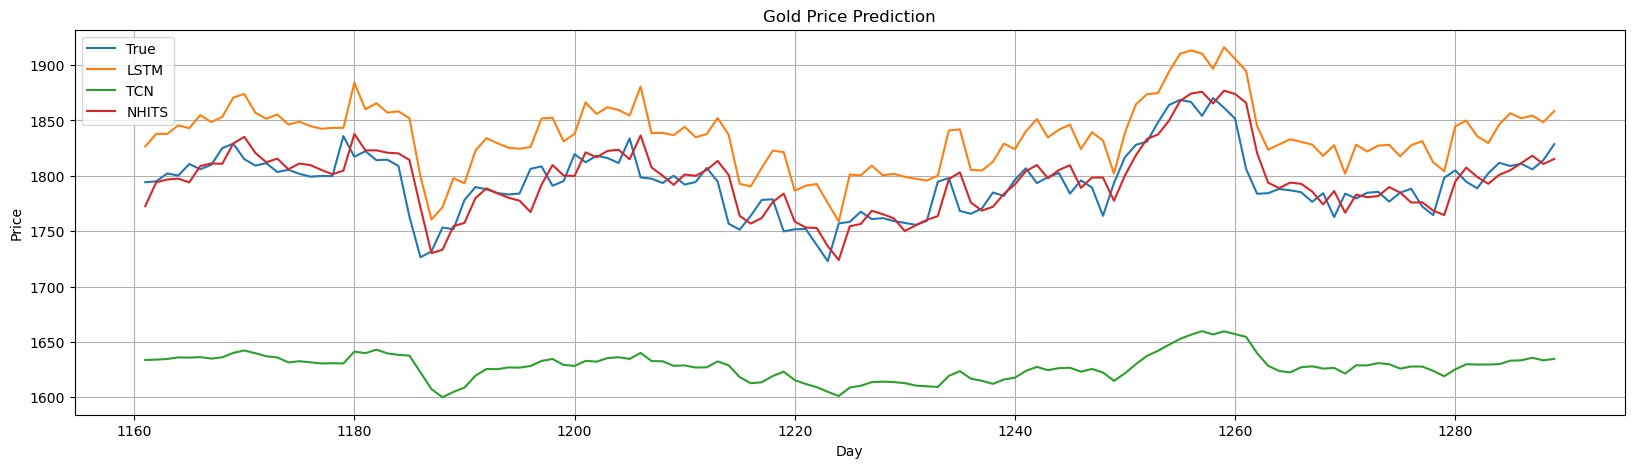

In [20]:
plt.figure(figsize=(20,5))
plt.plot(nn_gold['ds'], nn_gold['y'], label='True')
plt.plot(nn_gold['ds'], nn_gold['LSTM'], label='LSTM')
plt.plot(nn_gold['ds'], nn_gold['TCN'], label='TCN')
plt.plot(nn_gold['ds'], nn_gold['NHITS'], label='NHITS')
plt.xlabel('Day')
plt.ylabel('Price')
plt.title('Gold Price Prediction')
plt.grid()
plt.legend()
plt.show()

In [21]:
mae_lstm = mae(nn_gold['y'], nn_gold['LSTM'])
mae_tcn = mae(nn_gold['y'], nn_gold['TCN'])
mae_nhits = mae(nn_gold['y'], nn_gold['NHITS'])

print(f'LSTM: {mae_lstm:.3f}')
print(f'TCN: {mae_tcn:.3f}')
print(f'NHITS: {mae_nhits:.3f}')

LSTM: 42.194
TCN: 165.925
NHITS: 11.872


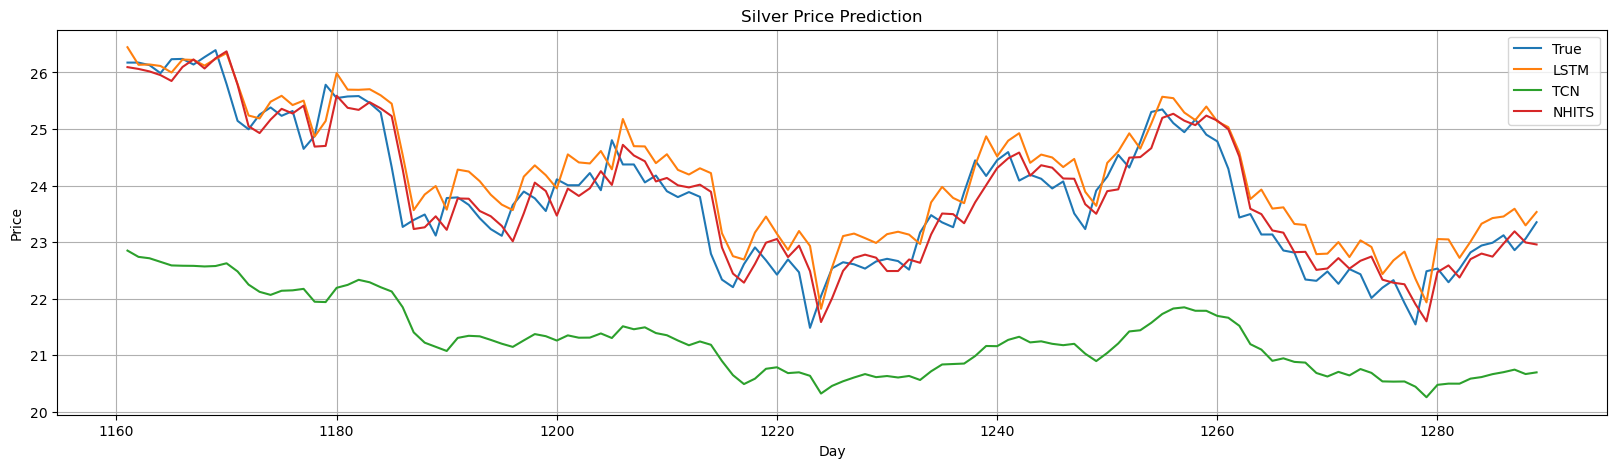

In [22]:
plt.figure(figsize=(20,5))
plt.plot(nn_silver['ds'], nn_silver['y'], label='True')
plt.plot(nn_silver['ds'], nn_silver['LSTM'], label='LSTM')
plt.plot(nn_silver['ds'], nn_silver['TCN'], label='TCN')
plt.plot(nn_silver['ds'], nn_silver['NHITS'], label='NHITS')
plt.xlabel('Day')
plt.ylabel('Price')
plt.title('Silver Price Prediction')
plt.grid()
plt.legend()
plt.show()

In [23]:
mae_lstm = mae(nn_silver['y'], nn_silver['LSTM'])
mae_tcn = mae(nn_silver['y'], nn_silver['TCN'])
mae_nhits = mae(nn_silver['y'], nn_silver['NHITS'])

print(f'LSTM: {mae_lstm:.3f}')
print(f'TCN: {mae_tcn:.3f}')
print(f'NHITS: {mae_nhits:.3f}')

LSTM: 0.443
TCN: 2.530
NHITS: 0.309


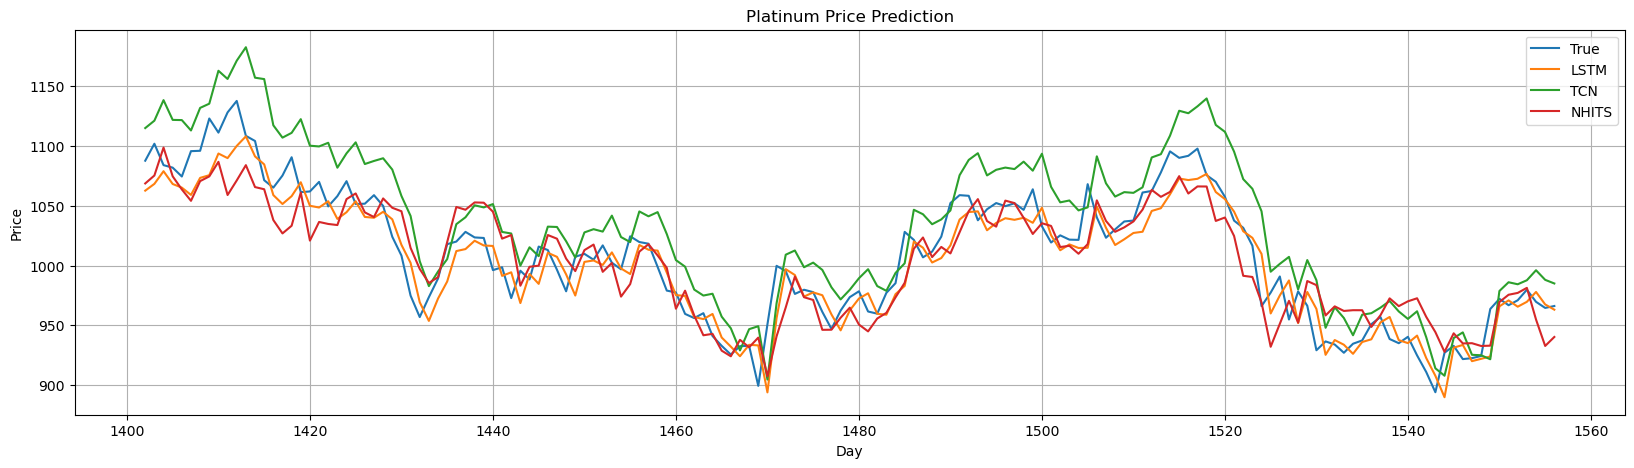

In [24]:
plt.figure(figsize=(20,5))
plt.plot(nn_platinum['ds'], nn_platinum['y'], label='True')
plt.plot(nn_platinum['ds'], nn_platinum['LSTM'], label='LSTM')
plt.plot(nn_platinum['ds'], nn_platinum['TCN'], label='TCN')
plt.plot(nn_platinum['ds'], nn_platinum['NHITS'], label='NHITS')
plt.xlabel('Day')
plt.ylabel('Price')
plt.title('Platinum Price Prediction')
plt.grid()
plt.legend()
plt.show()

In [25]:
mae_lstm = mae(nn_platinum['y'], nn_platinum['LSTM'])
mae_tcn = mae(nn_platinum['y'], nn_platinum['TCN'])
mae_nhits = mae(nn_platinum['y'], nn_platinum['NHITS'])

print(f'LSTM: {mae_lstm:.3f}')
print(f'TCN: {mae_tcn:.3f}')
print(f'NHITS: {mae_nhits:.3f}')

LSTM: 14.899
TCN: 29.303
NHITS: 20.509


In [26]:
%%capture
models_tf = [Informer(h=horizon,                 # Forecasting horizon
                      input_size=30,         # Input size
                      max_steps=1000,               # Number of training iterations
                      val_check_steps=100,          # Compute validation loss every 100 steps
                      early_stop_patience_steps=3), # Stop training if validation loss does not improve
             Autoformer(h=horizon,
                        input_size=30,
                        max_steps=1000,
                        val_check_steps=100,
                        early_stop_patience_steps=3),
             PatchTST(h=horizon,
                        input_size=30,
                        max_steps=1000,
                        val_check_steps=100,
                        early_stop_patience_steps=3),
             ]

Global seed set to 1
Global seed set to 1
Global seed set to 1


In [27]:
tf = NeuralForecast(models=models_tf, freq='D')

data_tf = tf.cross_validation(df=data,
                               val_size=int(.1*len(data.ds.unique())),
                               test_size=int(.1*len(data.ds.unique())),
                               n_windows=None)

Sanity Checking: 0it [00:00, ?it/s]

Training: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Predicting: 0it [00:00, ?it/s]

Sanity Checking: 0it [00:00, ?it/s]

Training: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Predicting: 0it [00:00, ?it/s]

Sanity Checking: 0it [00:00, ?it/s]

Training: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Predicting: 0it [00:00, ?it/s]

In [28]:
data_tf

,unique_id,ds,cutoff,Informer,Autoformer,PatchTST,y
0,gold,1161,1160,1.193229,1.067898,1.116271,1.150495
1,gold,1162,1161,1.204030,1.103162,1.175186,1.153642
2,gold,1163,1162,1.213531,1.167886,1.169328,1.181573
3,gold,1164,1163,1.245192,1.143723,1.184329,1.174098
4,gold,1165,1164,1.240979,1.179276,1.190378,1.215010
...,...,...,...,...,...,...,...
253,silver,1285,1284,0.971396,0.988295,0.923755,0.951773
254,silver,1286,1285,0.992538,0.992559,0.948709,0.983087
255,silver,1287,1286,1.002349,1.012512,0.983380,0.920697
256,silver,1288,1287,0.969304,0.948706,0.931675,0.968616


In [29]:
tf_predict = data_tf[data_tf['ds']-data_tf['cutoff']==horizon]
tf_predict

,unique_id,ds,cutoff,Informer,Autoformer,PatchTST,y
0,gold,1161,1160,1.193229,1.067898,1.116271,1.150495
1,gold,1162,1161,1.204030,1.103162,1.175186,1.153642
2,gold,1163,1162,1.213531,1.167886,1.169328,1.181573
3,gold,1164,1163,1.245192,1.143723,1.184329,1.174098
4,gold,1165,1164,1.240979,1.179276,1.190378,1.215010
...,...,...,...,...,...,...,...
253,silver,1285,1284,0.971396,0.988295,0.923755,0.951773
254,silver,1286,1285,0.992538,0.992559,0.948709,0.983087
255,silver,1287,1286,1.002349,1.012512,0.983380,0.920697
256,silver,1288,1287,0.969304,0.948706,0.931675,0.968616


In [30]:
tf_gold = tf_predict[tf_predict['unique_id']=='gold']
tf_silver = tf_predict[tf_predict['unique_id']=='silver']

In [31]:
tf_gold

,unique_id,ds,cutoff,Informer,Autoformer,PatchTST,y
0,gold,1161,1160,1.193229,1.067898,1.116271,1.150495
1,gold,1162,1161,1.204030,1.103162,1.175186,1.153642
2,gold,1163,1162,1.213531,1.167886,1.169328,1.181573
3,gold,1164,1163,1.245192,1.143723,1.184329,1.174098
4,gold,1165,1164,1.240979,1.179276,1.190378,1.215010
...,...,...,...,...,...,...,...
124,gold,1285,1284,1.287272,1.223770,1.199172,1.207929
125,gold,1286,1285,1.293059,1.182374,1.200946,1.216191
126,gold,1287,1286,1.289164,1.180822,1.208708,1.196128
127,gold,1288,1287,1.273728,1.157604,1.199881,1.228779


In [32]:
tf_gold[['Informer','Autoformer','PatchTST','y']] = tf_gold[['Informer','Autoformer','PatchTST','y']]*std_gold + mean_gold
tf_silver[['Informer','Autoformer','PatchTST','y']] = tf_silver[['Informer','Autoformer','PatchTST','y']]*std_silver + mean_silver

In [33]:
tf = NeuralForecast(models=models_tf, freq='D')

data_tf = tf.cross_validation(df=data_platinum,
                               val_size=int(.1*len(data_platinum.ds.unique())),
                               test_size=int(.1*len(data_platinum.ds.unique())),
                               n_windows=None)

Sanity Checking: 0it [00:00, ?it/s]

Training: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Predicting: 0it [00:00, ?it/s]

Sanity Checking: 0it [00:00, ?it/s]

Training: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Predicting: 0it [00:00, ?it/s]

Sanity Checking: 0it [00:00, ?it/s]

Training: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Predicting: 0it [00:00, ?it/s]

In [34]:
data_tf

,unique_id,ds,cutoff,Informer,Autoformer,PatchTST,y
0,platinum,1402,1401,1.234378,1.279432,1.240452,1.355287
1,platinum,1403,1402,1.228450,1.465369,1.365999,1.483643
2,platinum,1404,1403,1.262584,1.497326,1.524018,1.321842
3,platinum,1405,1404,1.284533,1.350617,1.370473,1.302860
4,platinum,1406,1405,1.252269,1.353220,1.273693,1.235970
...,...,...,...,...,...,...,...
150,platinum,1552,1551,0.290085,0.261549,0.292026,0.300418
151,platinum,1553,1552,0.298366,0.270772,0.314974,0.379963
152,platinum,1554,1553,0.356045,0.360114,0.360377,0.288667
153,platinum,1555,1554,0.232441,0.292681,0.274984,0.242567


In [35]:
tf_platinum = data_tf[data_tf['ds']-data_tf['cutoff']==horizon]
tf_platinum

,unique_id,ds,cutoff,Informer,Autoformer,PatchTST,y
0,platinum,1402,1401,1.234378,1.279432,1.240452,1.355287
1,platinum,1403,1402,1.228450,1.465369,1.365999,1.483643
2,platinum,1404,1403,1.262584,1.497326,1.524018,1.321842
3,platinum,1405,1404,1.284533,1.350617,1.370473,1.302860
4,platinum,1406,1405,1.252269,1.353220,1.273693,1.235970
...,...,...,...,...,...,...,...
150,platinum,1552,1551,0.290085,0.261549,0.292026,0.300418
151,platinum,1553,1552,0.298366,0.270772,0.314974,0.379963
152,platinum,1554,1553,0.356045,0.360114,0.360377,0.288667
153,platinum,1555,1554,0.232441,0.292681,0.274984,0.242567


In [36]:
tf_platinum[['Informer','Autoformer','PatchTST','y']] = tf_platinum[['Informer','Autoformer','PatchTST','y']]*std_platinum + mean_platinum

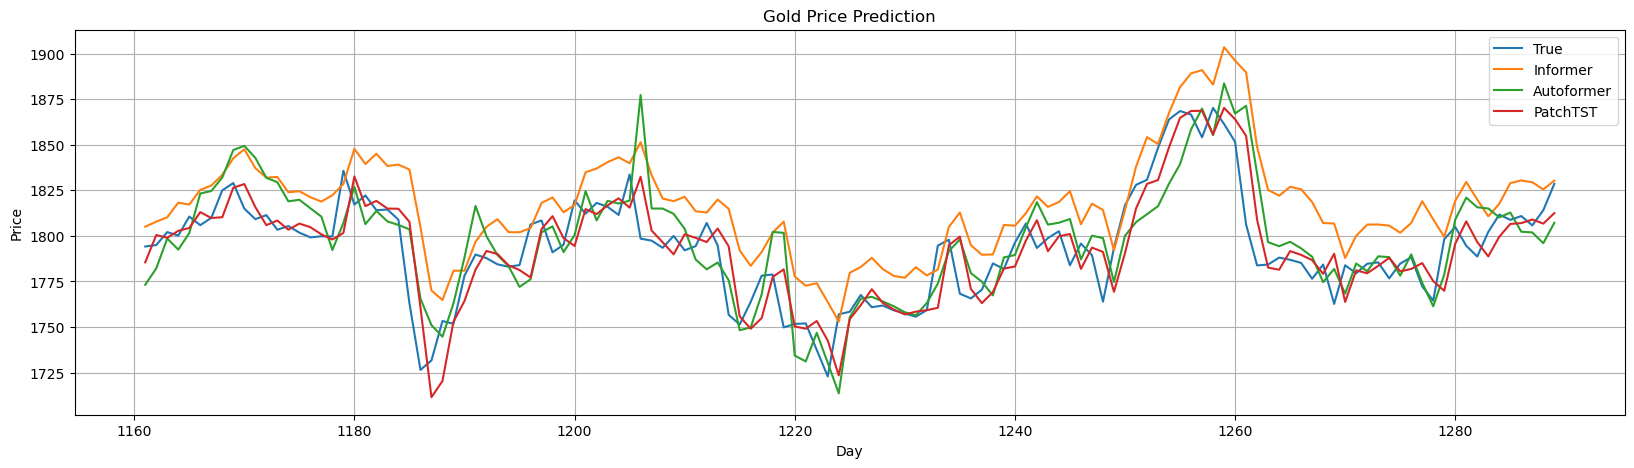

In [38]:
plt.figure(figsize=(20,5))
plt.plot(tf_gold['ds'], tf_gold['y'], label='True')
plt.plot(tf_gold['ds'], tf_gold['Informer'], label='Informer')
plt.plot(tf_gold['ds'], tf_gold['Autoformer'], label='Autoformer')
plt.plot(tf_gold['ds'], tf_gold['PatchTST'], label='PatchTST')
plt.xlabel('Day')
plt.ylabel('Price')
plt.title('Gold Price Prediction')
plt.grid()
plt.legend()
plt.show()

In [39]:
mae_lstm = mae(tf_gold['y'], tf_gold['Informer'])
mae_tcn = mae(tf_gold['y'], tf_gold['Autoformer'])
mae_nhits = mae(tf_gold['y'], tf_gold['PatchTST'])

print(f'Informer: {mae_lstm:.3f}')
print(f'Autoformer: {mae_tcn:.3f}')
print(f'PatchTST: {mae_nhits:.3f}')

Informer: 23.659
Autoformer: 15.125
PatchTST: 11.125


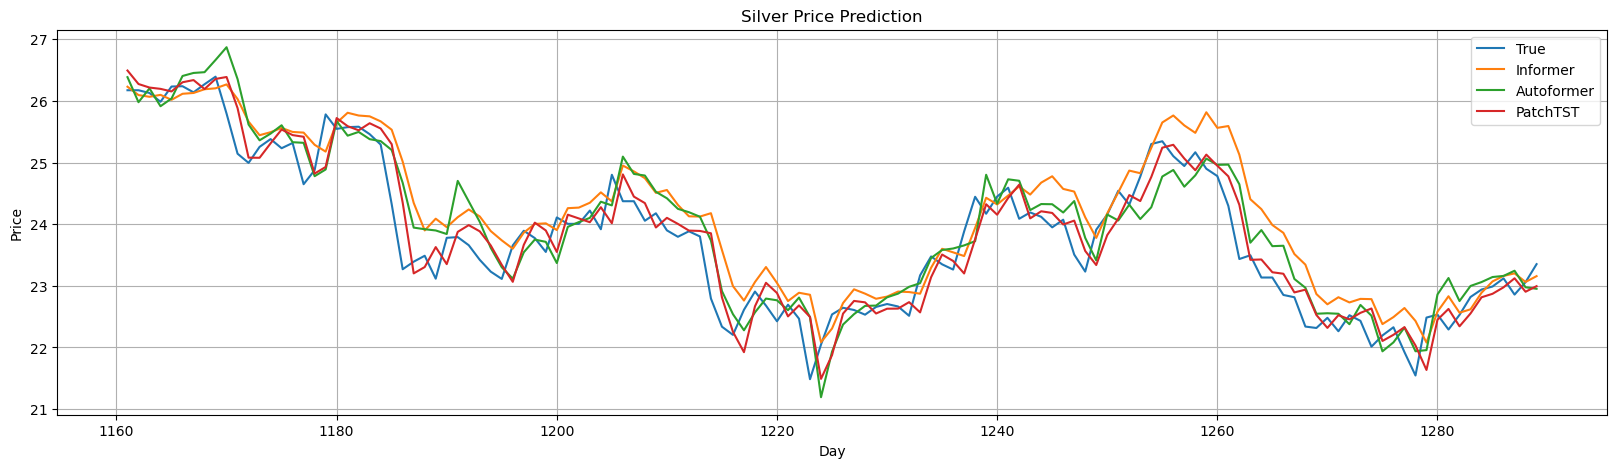

In [40]:
plt.figure(figsize=(20,5))
plt.plot(tf_silver['ds'], tf_silver['y'], label='True')
plt.plot(tf_silver['ds'], tf_silver['Informer'], label='Informer')
plt.plot(tf_silver['ds'], tf_silver['Autoformer'], label='Autoformer')
plt.plot(tf_silver['ds'], tf_silver['PatchTST'], label='PatchTST')
plt.xlabel('Day')
plt.ylabel('Price')
plt.title('Silver Price Prediction')
plt.grid()
plt.legend()
plt.show()

In [41]:
mae_lstm = mae(tf_silver['y'], tf_silver['Informer'])
mae_tcn = mae(tf_silver['y'], tf_silver['Autoformer'])
mae_nhits = mae(tf_silver['y'], tf_silver['PatchTST'])

print(f'Informer: {mae_lstm:.3f}')
print(f'Autoformer: {mae_tcn:.3f}')
print(f'PatchTST: {mae_nhits:.3f}')

Informer: 0.442
Autoformer: 0.382
PatchTST: 0.306


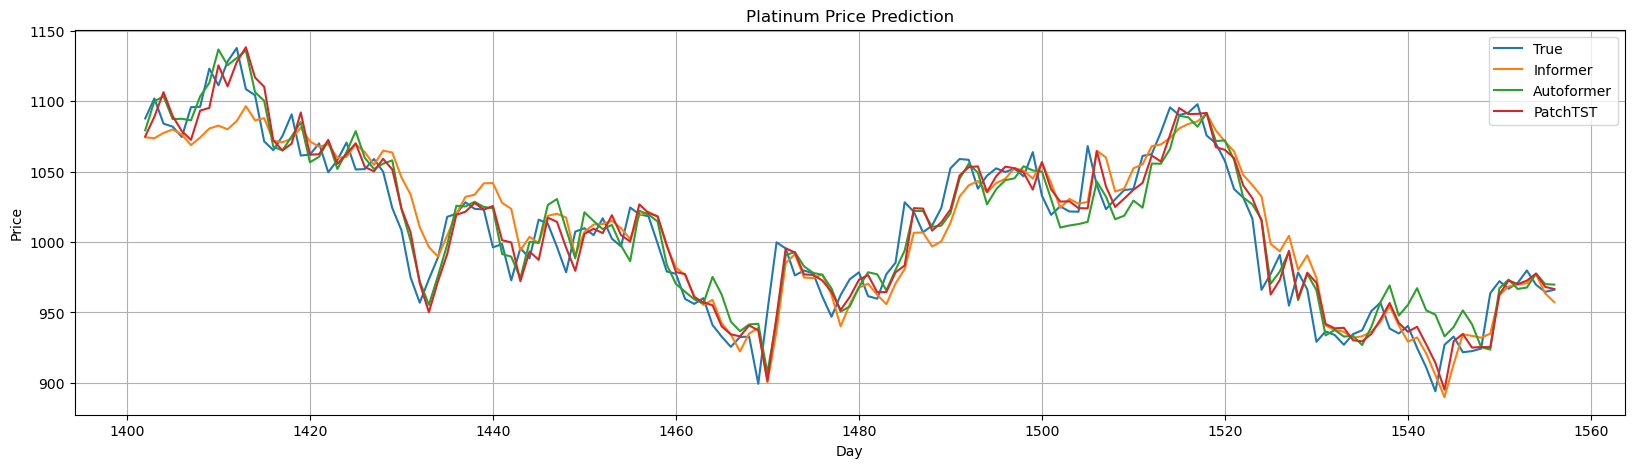

In [42]:
plt.figure(figsize=(20,5))
plt.plot(tf_platinum['ds'], tf_platinum['y'], label='True')
plt.plot(tf_platinum['ds'], tf_platinum['Informer'], label='Informer')
plt.plot(tf_platinum['ds'], tf_platinum['Autoformer'], label='Autoformer')
plt.plot(tf_platinum['ds'], tf_platinum['PatchTST'], label='PatchTST')
plt.xlabel('Day')
plt.ylabel('Price')
plt.title('Platinum Price Prediction')
plt.grid()
plt.legend()
plt.show()

In [43]:
mae_lstm = mae(tf_platinum['y'], tf_platinum['Informer'])
mae_tcn = mae(tf_platinum['y'], tf_platinum['Autoformer'])
mae_nhits = mae(tf_platinum['y'], tf_platinum['PatchTST'])

print(f'Informer: {mae_lstm:.3f}')
print(f'Autoformer: {mae_tcn:.3f}')
print(f'PatchTST: {mae_nhits:.3f}')

Informer: 16.400
Autoformer: 14.662
PatchTST: 13.683
